In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def euler(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Euler.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """
    return x + dt*f(x,t,p)

In [3]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [4]:
def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

# Ejercicio 1:

Considere la Ecuación Diferencial Ordinaria (ODE) 

$$\dot{x}=-a x + b$$

donde $a,b>0$.

1. Encuentre el/los puntos fijos.

2. Determine la estabilidad lineal de el/los mismo/s.

3. Use el método de integración de Runge Kutta de orden 4 para calcular la trayectoria de la solución $x(0)=1$ usando $k=20$ pasos de integración en $t\in [0,5]$ para $a=2$ y $b=3$.

4. Grafique la trayectoria $x(t)$. Compare con la solución exacta de condicion inicial $x(0)=x_0$:
\begin{eqnarray}
x(t) &=& \bigg(x_0-\frac{b}{a}\bigg)e^{-at}+\frac{b}{a} \\
\end{eqnarray}

5. Grafique $\dot{x}$ vs $x$. Incluya:

    a. Los puntos fijos, en blanco si son inestables, en negro si son estables y en rojo si son linealmente marginales.
    
    b. En gris a rayas, la linea $\dot{x}=0$ para todo $x$.
    
    c. En azul, flechas que indiquen la dirección de cambio en cada región entre puntos fijos, incluyendo los puntos $x = \pm \infty$.

## Intermezzo: derivación de la solución exacta

Usamos el método de la diferencial exacta
\begin{eqnarray}
\frac{dx}{dt} &=& -ax+b \\
\frac{dx}{-ax+b} &=& dt \\
\frac{-1}{a}\frac{dy}{y} &=& t + c, \;\;\;\;\; y=-ax+b, dy=-adx\\
\ln y &=& -at+d, \;\;\;\; d = -ac\\
y &=& ge^{-at},\;\;\;\; g=e^{d}\\
-ax+b &=& ge^{-at} \\
-ax &=& ge^{-at}-b \\
x &=& he^{-at}+\frac{b}{a} \\
\end{eqnarray}
donde $h$ es la contante determinada, por ejemplo, por la condición inicial
\begin{eqnarray}
x_0 &=& x(0) \\
&=& h+\frac{b}{a} \\
x_0-\frac{b}{a} = h
\end{eqnarray}
En resumen
\begin{eqnarray}
x(t) &=& \bigg(x_0-\frac{b}{a}\bigg)e^{-at}+\frac{b}{a} \\
\end{eqnarray}


## Rta. 1.1

La ODE es de la forma $\dot{x}=f(x)$ con $f(x)=-ax+b$. Los puntos fijos $x^*$ satisfacen $f(x^*)=0$. Por ende

\begin{eqnarray}
0 &=& -ax^*+b \\
ax^* & = & b \\
x^* & = & b/a
\end{eqnarray}

Es decir, $x^*=b/a$ es el único punto fijo del sistema.

## Rta. 1.2

Sea $\eta := x-x^*$. Luego, la estabilidad lineal de un punto fijo $x^*$ es caracterizada por la expansión truncada en serie de Talyor

$$\frac{x^*+\eta}{dt} = 0 + \dot{\eta} = \dot{\eta} = f(x^*) + f'(x^*)\eta + ... = 0 + f'(x^*)\eta + ... = f'(x^*)\eta + ...$$

En resumen, por

$$\dot{\eta} = f'(x^*)\eta + ...$$

que en el presente caso se reduce a

$$\dot{\eta} = -a\eta + ...$$

Despreciando términos de ordenes superiores, lo cual equivale a comenzar con $|\eta|\ll 1$, i.e. una condición inicial cercana a $x^*$, las soluciones de la anterior ecuación son de la forma

$$\eta = g e^{-at}$$

las cuales convergen a $0$ para $t\to \infty$. Vemos, entonces, que $x^*$ es un punto fijo atractivo.

## Rta. 1.3

In [5]:
def f(x,t,p):
    """
    x : R^1
    t : R
    p = (a,b) : R^2
    
    return
    
    -a*x+b
    """
    return -p[0]*x[0]+p[1]

In [6]:
m=euler
#m=rk4
a=2
b=3
p=np.array([a,b])
x0=np.array([1.0])
tini=0.0
tend=5.0
k=20
t,x = integrador_ode(m,f,x0,tini,tend,k,p)

In [7]:
t

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [8]:
x

array([[1.        , 1.25      , 1.375     , 1.4375    , 1.46875   ,
        1.484375  , 1.4921875 , 1.49609375, 1.49804688, 1.49902344,
        1.49951172, 1.49975586, 1.49987793, 1.49993896, 1.49996948,
        1.49998474, 1.49999237, 1.49999619, 1.49999809, 1.49999905,
        1.49999952]])

## Rta. 1.4

In [9]:
def x_exact(t,x0,p):
    """
    t : R
    x0 : R^1
    p = (a,b) : R^2
    """
    return (x0[0]-p[1]/p[0])*np.exp(-p[0]*t)+p[1]/p[0]

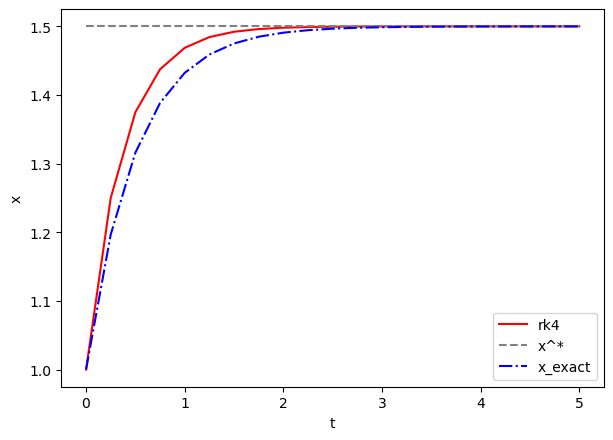

In [10]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
#plt.title("Ejemplo 2")
plt.xlabel("t")
plt.ylabel("x")
plt.plot(t,x[0,:],label='rk4',color='red',linestyle='-')
xstar = b/a # Punto fijo.
plt.plot(t,xstar*np.ones(len(t)),label='x^*',color='gray',linestyle='--')
plt.plot(t,[x_exact(_t,x0,p) for _t in t],label='x_exact',color='blue',linestyle='-.')
plt.legend()
plt.show()

## Rta. 1.5

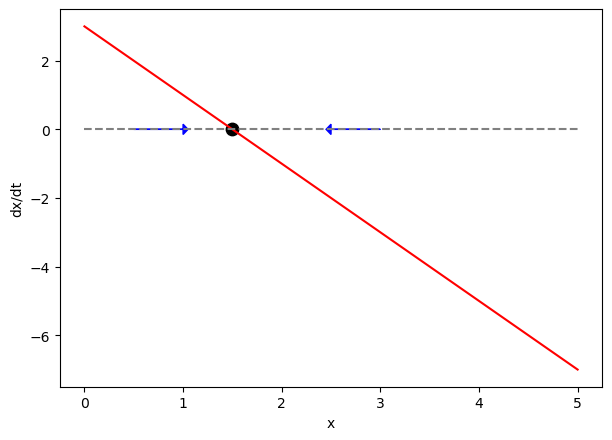

In [11]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
#plt.title("Ejemplo 2")
plt.xlabel("x")
plt.ylabel("dx/dt")
#plt.ylim(-0.3,0.3)

def _f(x):
    return f([x],None,[a,b])

x = np.linspace(0.0,5.0,100)
dotx = np.array([_f(y) for y in x])

# Graficamos f(x) vs x
plt.plot(x,dotx,label='a',color='red',linestyle='-')

# Graficamos linea punteada gris
plt.plot(x,np.zeros(100),label='',color='grey',linestyle='--')

# Graficamos punto inestable en 0,0 y punto estable en 1,0.
#plt.scatter([0],[0],label='',color='white',marker='o',edgecolors="black",linewidth=1,s=80)
plt.scatter([b/a],0,label='',color='black',marker='o',edgecolors="black",linewidth=1,s=80)

# Graficamos punto de máxima velocidad en 1/2,f(1/2)
#plt.scatter([0.5],[_f(0.5)],label='',color='green',marker='o',edgecolors="black",linewidth=1,s=80)

# Graficamos flechas.
plt.arrow(0.5,0.0,0.5,0.0, head_width=0.3,head_length=0.05,fc='b',ec='b')
plt.arrow(3.0,0.0,-0.5,0.0, head_width=0.3,head_length=0.05,fc='blue',ec='blue')

#plt.legend()
plt.show()

# Ejercicio 2:

La ecuación logística es

$$\dot{N} = rN\bigg(1-\frac{N}{K}\bigg)$$

donde $r>0$ representa una taza de reproducción y $K>0$ una capacidad de carga.

1. Determine los puntos fijos.

2. Determine la estabilidad de los puntos fijos.

3. Utilice el integrador de Runge Kutta de orden 4 para calcular y graficar usando $k=100$ pasos de integración en $t\in [0,5]$ para $r=1$, $K=1$ y: 

    a. $N(0)=0.1K$
    
    b. $N(0)=0.7K$ 
    
    c. $N(0)=1.2K$

4. Grafique con lineas punteadas la solución exacta en donde la condición inicial viene dada por $N(0)=Kx_0$:
$$x(t) = \frac{\frac{x_0}{1-x_0}e^{rt}}{1+\frac{x_0}{1-x_0}e^{rt}}$$

5. Repita 2.3 y 2.4 para $r=0.25$ y $r=4$.

6. Discuta lo observado hasta el momento.

7. Grafique $\dot{x}=f(x)$ vs $x$ para $x\in [0,1.25]$, $r=1$ y $K=1$. Incluya:

    a. Los puntos fijos, en blanco los linealmente inestables, en negro los linealmente estables y en amarillo los linealmente marginales.
    
    b. Con una línea punteada gris, la curva $\dot{x}=0$.
    
    c. Flechas azules que indiquen la dirección de la velocidad.
    
    d. En verde, el punto de máxima velocidad.

8. Observe en los puntos 2.3 y 2.5 que la curva del caso a. presenta un cambio de concavidad y mientras que la curva del caso b. no lo hace. Use el gráfico del punto 2.7 para explicar lo que ocurre.

## Intermezzo: derivación de la solución exacta

Usamos el método de las diferenciales exactas
\begin{eqnarray}
\frac{dx}{dt} & = & rx(1-x) \\
\frac{dx}{x(1-x)} & = & rdt \\
\frac{dx}{x}+\frac{dx}{1-x} & = & rdt \\
\int \frac{dx}{x}+ \int \frac{dx}{1-x} & = & \int rdt \\
\ln x - \int \frac{du}{u} & = & rt+c,\;\;\;\; u=1-x,\; du=-dx \\
\ln x - \ln(1-x) & = & rt+c \\
\ln \frac{x}{1-x} & = & rt+c \\
\frac{x}{1-x} & = & ge^{rt},\;\;\;\; g=e^c \\
x = \frac{ge^{rt}}{1+ge^{rt}}
\end{eqnarray}
donde $g$ queda determinado, por ejemplo, por la condición inicial
\begin{eqnarray}
x_0 &=& x(0) = \frac{g}{1+g} \\
x_0(1+g) &=& g \\
x_0+x_0g &=& g \\
x_0 &=& g(1-x_0) \\
\frac{x_0}{1-x_0} &=& g
\end{eqnarray}
En resumen
$$x(t) = \frac{\frac{x_0}{1-x_0}e^{rt}}{1+\frac{x_0}{1-x_0}e^{rt}}$$

## Rta. 2.1

Conviene definir $x=N/K$ y reescribir la ecuación como

\begin{eqnarray}
\dot{N} & = & r N\bigg(1-\frac{N}{K}\bigg) \\
\frac{\dot{N}}{K} & = & r \frac{N}{K}\bigg(1-\frac{N}{K}\bigg) \\
\dot{x} & = & r x(1-x) \\
\end{eqnarray}

Los puntos fijos $x^*$ quedan determinados por la condición $f(x^*)=0$, es decir

$$0=r x^*(1-x^*)$$

la cuál se cumple si:

a. $x=0$

b. $x=1$.

## Rta. 2.2


Para determinar la estabilidad, proponemos $\eta:=x-x^*$. Luego, recordemos que

\begin{eqnarray}
\frac{d(x^*+\eta)}{dt}
&=&
f(x^*) + f'(x^*)\eta + ...
\\
\dot{\eta}
&=&
0+f'(x^*)\eta + ...
\end{eqnarray}

En particular, $f(x)=r x (1-x)=rx-rx^2$. Entonces, $f'(x)=r-2rx=r(1-2x)$, por lo que

\begin{eqnarray}
\dot{\eta}
&=&
r(1-2x^*)\eta
\end{eqnarray}

Luego, $x^*$ es linealmente estable si $x^*<1/2$, marginal si $x^*=1/2$ e inestable si $x^*>1/2$.

Entonces, el punto fijo $x^*=0$ resulta inestable, mientras que $x^*=1$ resulta estable.

## Rta. 2.3 y 2.4

In [12]:
def f(x,t,p):
    """x[0] es x y p[0] es r"""
    return p[0]*x[0]*(1-x[0])

In [13]:
def xexacta(t,x0,p):
    y = x0[0]/(1.0-x0[0])*np.exp(p[0]*t)
    return y/(1.0+y)

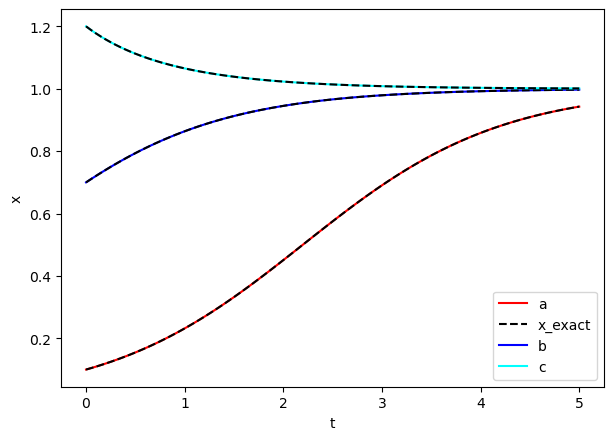

In [14]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
#plt.title("Ejemplo 2")
plt.xlabel("t")
plt.ylabel("x")

r=[1.0]
a=0.0
b=5.0
k=100

#m = euler
m = rk4

x0=[0.1]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='a',color='red',linestyle='-')
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='x_exact',color='black',linestyle='--')

x0=[0.7]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='b',color='blue',linestyle='-')
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='',color='black',linestyle='--')

x0=[1.2]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='c',color='cyan',linestyle='-')    
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='',color='black',linestyle='--')

plt.legend()
plt.show()

## Rta. 2.5

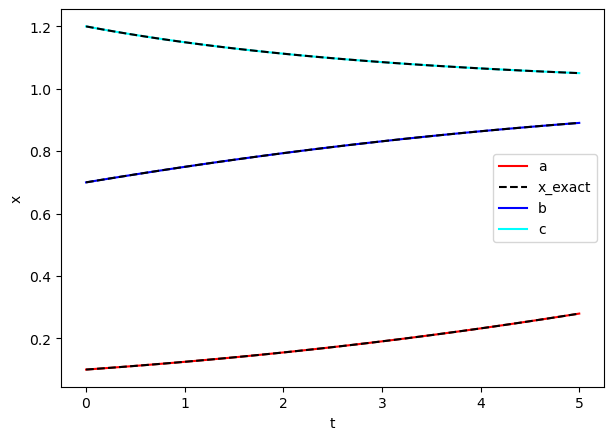

In [15]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
#plt.title("Ejemplo 2")
plt.xlabel("t")
plt.ylabel("x")

r=[0.25]
a=0.0
b=5.0
k=100

x0=[0.1]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='a',color='red',linestyle='-')
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='x_exact',color='black',linestyle='--')

x0=[0.7]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='b',color='blue',linestyle='-')
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='',color='black',linestyle='--')

x0=[1.2]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='c',color='cyan',linestyle='-')    
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='',color='black',linestyle='--')

plt.legend()
plt.show()

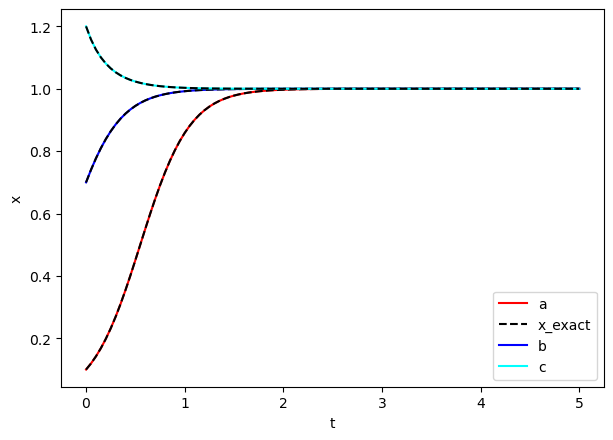

In [16]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
#plt.title("Ejemplo 2")
plt.xlabel("t")
plt.ylabel("x")

r=[4.0]
a=0.0
b=5.0
k=100

x0=[0.1]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='a',color='red',linestyle='-')
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='x_exact',color='black',linestyle='--')

x0=[0.7]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='b',color='blue',linestyle='-')
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='',color='black',linestyle='--')

x0=[1.2]
t,x = integrador_ode(m,f,x0,a,b,k,r)
plt.plot(t,x[0,:],label='c',color='cyan',linestyle='-')    
plt.plot(t,[xexacta(_t,x0,r) for _t in t],label='',color='black',linestyle='--')

plt.legend()
plt.show()

## Rta. 2.6

Los casos **2.3.a** $x(0)=0.1$ y **2.3.b** $x(0)=0.7$ corresponden a condiciones iniciales entre el punto fijo $x^*=0$ que es inestable y el punto fijo $x^*=1$ que es estable. Las trayectorias convergen al punto fijo $x^*=1$.

El caso **2.3.c** $x(0)=1.2$ corresponde a una condición inicial por encima del punto fijo estable $x^*=1$. La trayectoria converge hacia dicho punto.

El parámetro $r$ determina la velocidad de convergencia. A mayor valor de $r$, más rápida es la convergencia.

## Rta. 2.7

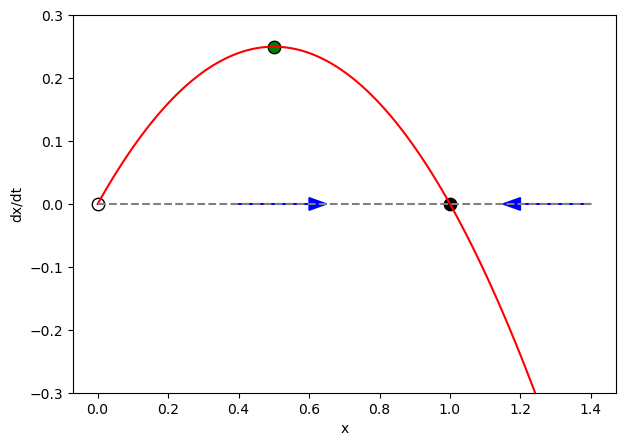

In [17]:
plt.rcParams["figure.figsize"] = (7,5) # Dimensions of the figure
plt.rcParams['figure.dpi'] = 100 # Resolucion
#plt.title("Ejemplo 2")
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.ylim(-0.3,0.3)

def _f(x):
    return f([x],None,[1.0])

x = np.linspace(0.0,1.4,100)
dotx = np.array([_f(y) for y in x])

# Graficamos f(x) vs x
plt.plot(x,dotx,label='a',color='red',linestyle='-')

# Graficamos linea punteada gris
plt.plot(x,np.zeros(100),label='',color='grey',linestyle='--')

# Graficamos punto inestable en 0,0 y punto estable en 1,0.
plt.scatter([0],[0],label='',color='white',marker='o',edgecolors="black",linewidth=1,s=80)
plt.scatter([1],[0],label='',color='black',marker='o',edgecolors="black",linewidth=1,s=80)

# Graficamos punto de máxima velocidad en 1/2,f(1/2)
plt.scatter([0.5],[_f(0.5)],label='',color='green',marker='o',edgecolors="black",linewidth=1,s=80)

# Graficamos flechas.
plt.arrow(0.4,0.0,0.2,0.0,head_width=0.02,head_length=0.05,fc='b',ec='b')
plt.arrow(1.4,0.0,-0.2,0.0,head_width=0.02,head_length=0.05,fc='blue',ec='blue')

#plt.legend()
plt.show()

## Rta. 2.8

En el gráfico de 2.7, se observa la máxima velocidad en el punto verde. Para valores de $x$ anteriores al del punto $x$, la velocidad crece con $x$. Para valores posteriores, decrece con $x$ hasta que se vuelve cero en el punto negro o de equilibrio. Es en dicho punto verde que la trayectoria cambia de concavidad.